In [ ]:
#importing library
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [ ]:
#importing dataset of letter recognisation
Datam = pd.read_csv("/content/Magic.csv")
Datal = pd.read_csv("letter-recognition.csv")
Datal=Datal.rename({'letter': 'class'}, axis=1)

In [ ]:
Datal

,class,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:

Datam = Datam.sample(frac=1,random_state=42).reset_index(drop=True)
Datam=Datam.drop(['Unnamed: 0'],axis = 1)
Datam

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240,h
1,23.4858,0.0000,2.2393,0.7378,0.3775,-2.9397,13.0915,0.0001,19.3410,235.3420,g
2,40.5429,19.4073,3.3382,0.2369,0.1269,29.1908,27.0567,-7.1243,10.0643,195.6030,g
3,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655,h
4,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730,h
...,...,...,...,...,...,...,...,...,...,...,...
19015,31.9212,16.7667,2.6566,0.3837,0.2348,3.7913,21.0170,3.4354,3.0450,249.3750,g
19016,43.4538,17.6541,2.9965,0.2621,0.1426,-12.4850,-23.2863,-11.3567,6.2607,184.7290,g
19017,19.9926,12.0866,2.4354,0.5725,0.3982,16.1410,16.3239,9.4374,12.7719,193.8930,g
19018,31.4336,23.2651,2.9340,0.2957,0.1717,-9.1278,19.8518,19.2893,79.9590,23.2363,g


In [ ]:
Datal=Datal.replace(['A','B','C','D','E','F','G','H','I','J','K','L','M'],1)

In [ ]:
Datal=Datal.replace(['N','O','P','Q','R','S','T','U','V','W','X','Y','Z'],-1)
Datal

,class,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,-1,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,1,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,1,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,-1,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,-1,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
#printing letters in order
m=len(Datam['class'])
count0=0
for i in range(m):
  # print(Datam['letter'][i])
  if ord(Datam['class'][i])==ord('g'):
    # label.append(1)
    Datam['class'][i]=1
    count0+=1
  else:
    if ord(Datam['class'][i])==ord('h'):
    # label.append(-1) 
     Datam['class'][i]=-1  
print(count0)
Datam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


12332


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240,-1
1,23.4858,0.0000,2.2393,0.7378,0.3775,-2.9397,13.0915,0.0001,19.3410,235.3420,1
2,40.5429,19.4073,3.3382,0.2369,0.1269,29.1908,27.0567,-7.1243,10.0643,195.6030,1
3,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655,-1
4,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730,-1
...,...,...,...,...,...,...,...,...,...,...,...
19015,31.9212,16.7667,2.6566,0.3837,0.2348,3.7913,21.0170,3.4354,3.0450,249.3750,1
19016,43.4538,17.6541,2.9965,0.2621,0.1426,-12.4850,-23.2863,-11.3567,6.2607,184.7290,1
19017,19.9926,12.0866,2.4354,0.5725,0.3982,16.1410,16.3239,9.4374,12.7719,193.8930,1
19018,31.4336,23.2651,2.9340,0.2957,0.1717,-9.1278,19.8518,19.2893,79.9590,23.2363,1


In [ ]:
Data_trainm=Datam.sample(frac=0.666667)
Data_trainl=Datal.sample(frac=0.666667)
Data_testm = Datam.drop(Data_trainm.index)
Data_testl= Datal.drop(Data_trainl.index)
# Data_train=Data_train.sample(n=2000,replace='False')
print(Data_trainm.shape)
Data_trainm

(12680, 11)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
18966,49.0906,13.5019,2.5250,0.3194,0.1716,-15.1559,40.9727,-5.5597,79.8970,137.4400,-1
1188,78.1818,38.0072,3.6764,0.2142,0.1128,-54.8170,-43.2986,13.5114,0.7960,378.6140,1
8595,12.7169,11.6432,2.2443,0.7066,0.3960,15.6373,-9.3618,7.7526,15.6510,174.1360,1
5958,23.4293,15.0895,2.7513,0.4858,0.2952,10.2046,17.1517,-5.1196,15.3110,89.2638,1
3946,35.7084,15.7785,2.5031,0.3799,0.2057,31.7379,29.6927,-8.4502,35.0690,197.8770,1
...,...,...,...,...,...,...,...,...,...,...,...
18729,31.5230,21.2047,2.9039,0.2782,0.1578,21.6175,-7.0159,-12.9648,1.1530,261.6680,1
11663,28.2322,15.5154,2.6532,0.4244,0.2278,-25.6142,5.6554,11.6242,15.5585,214.1570,-1
7030,49.4996,20.1666,2.9682,0.1947,0.0984,-17.5656,18.3328,-15.0923,12.7026,183.1530,1
18172,74.4856,26.1142,3.1353,0.2036,0.1146,77.0422,70.4962,24.1085,15.2135,236.6830,1


In [ ]:
print(Data_trainl.shape)
Data_trainl
# Data_trainl=Datal.rename({'letter': 'class'}, axis=1)

(13333, 17)


,class,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
8592,1,7,13,6,7,3,5,5,3,8,10,4,13,2,5,6,7
9579,1,4,8,5,6,4,7,8,6,6,7,6,7,3,8,3,7
11456,1,4,6,4,4,3,5,7,9,7,7,6,6,2,8,3,8
2248,-1,2,1,4,2,1,6,13,3,2,8,11,8,2,10,1,8
15446,1,4,11,6,8,4,12,2,4,3,11,1,9,3,7,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19315,-1,4,10,6,8,4,7,11,1,3,6,10,9,3,11,1,8
1044,1,2,3,4,2,2,6,6,3,3,9,8,9,5,5,1,8
11270,-1,5,9,7,6,5,7,12,7,2,11,5,3,2,12,4,8
18208,-1,8,10,8,8,5,3,12,2,3,9,11,8,4,12,2,7


In [ ]:
def svm_random(Data_train,Data_test):
  pp=0;
  linear_model = SVC(kernel='linear')
  accs=[]
  while pp<20:
    Data_random=Data_train.sample(n=500)
    X_train = Data_random.drop(['class'],axis = 1)
    y_train = Data_random['class']
    y_train=y_train.astype('int')
    X_test = Data_test.drop(['class'],axis = 1)
    y_test =  Data_test['class']
    y_test=y_test.astype('int')
    linear_model.fit(X_train,y_train)
    y_pred = linear_model.predict(X_test)
    pp+=1
    acc=metrics.accuracy_score(y_true = y_test,y_pred = y_pred)
    accs.append(1-acc)
  plt.title("misclassification graph for random")  
  plt.xlabel("X axis")  
  plt.ylabel("Y axis")  
  plt.plot(np.arange(1,21), accs, color ="red")  
  plt.show()
  return 100*np.mean(accs),100*np.std(accs)

In [ ]:
def loss(f,z):
  if f*z>1:
    return 0
  else:
    return (1-f*z)

In [ ]:
import math
def markovsampling(df):
  linear_model = SVC(kernel='linear')
  dtr=df.copy()
  X_train = dtr.drop(['class'],axis = 1)
  y_train = dtr['class']
  y_train=y_train.astype('int')
  linear_model.fit(X_train,y_train)
  sample = df[0:0]
  m0=0
  m1=0
  zt=dtr.sample(n=1)
  ztl=zt.to_numpy()
  id=len(sample)
  sample = sample.append(pd.DataFrame(ztl,index=[id+1],columns=sample.columns))
  dtr=dtr.drop(zt.index)
  yl=zt['class'].to_numpy()
  yt=yl[0]
  if yt==-1:
    m0+=1
  else:
    m1+=1
  ydt=linear_model.predict(zt.drop(['class'],axis = 1))
  kvalmax=10
  kval=0
  while (m0<m/2 or m1<m/2) and len(dtr)>0:
    id=len(sample)
    zst=dtr.sample(n=1)
    zstl=zst.to_numpy()
    dtr=dtr.drop(zst.index)
    ysl=zst['class'].to_numpy()
    yst=ysl[0]
    ydst=linear_model.predict(zst.drop(['class'],axis = 1))
    pr=math.exp(-loss(ydst,ydst))/math.exp(-loss(ydt,yt))
    if pr==1 and yt==-1 and yst==-1:
      sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
    elif pr==1 and yt==1 and yst==1:
      sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
    elif (pr==1 and yt*yst==-1) or pr<0:
      sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
    elif pr>1:
      sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
    elif kval==kvalmax:
      sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      kval=0
    else:
      kval+=1
    zt=zst
    if yst==-1:
     m0+=1
    else:
     m1+=1
  return sample
    


In [1]:
def svm_markov(Data_train,Data_test):
  pp=0;
  linear_model = SVC(kernel='linear')
  accs=[]
  while pp<20:
    dtr=Data_train.sample(n=500)
    dtr.reset_index(drop=True, inplace=True)  
    Data_markov=markovsampling(dtr)
    # print(Data_markov.shape)
    X_train = Data_markov.drop(['class'],axis = 1)
    y_train = Data_markov['class']
    y_train=y_train.astype('int')
    X_test = Data_test.drop(['class'],axis = 1)
    y_test =  Data_test['class']
    y_test=y_test.astype('int')
    linear_model.fit(X_train,y_train)
    y_pred = linear_model.predict(X_test)
    acc=metrics.accuracy_score(y_true = y_test,y_pred = y_pred)
    accs.append(1-acc)
    pp+=1
  plt.title("misclassification graph for markov")  
  plt.xlabel("X axis")  
  plt.ylabel("Y axis")  
  plt.plot(np.arange(1,21), accs, color ="green")  
  plt.show()
  return 100*np.mean(accs),100*np.std(accs)

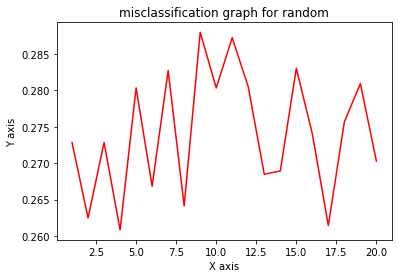

mean misclassification rate for random sample with std (27.40962951852407, 0.8326596940227677)


In [ ]:
print("mean misclassification rate for random sample with std",svm_random(Data_trainl,Data_testl))

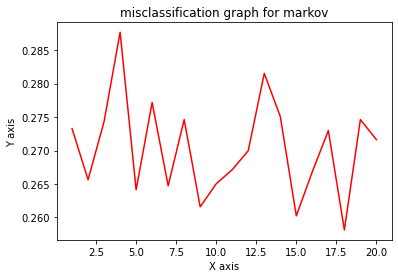

mean misclassification rate for markov sample with std (27.03239838008099, 0.7198057892010055)


In [ ]:
print("mean misclassification rate for markov sample with std",svm_markov(Data_trainl,Data_testl))

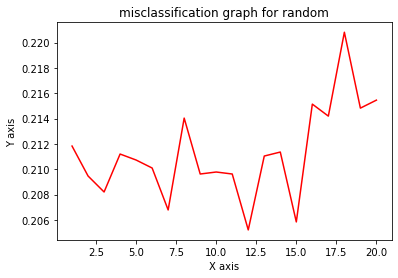

mean misclassification rate for random sample with std (21.126182965299684, 0.3615532815620027)


In [ ]:
print("mean misclassification rate for random sample with std",svm_random(Data_trainm,Data_testm))

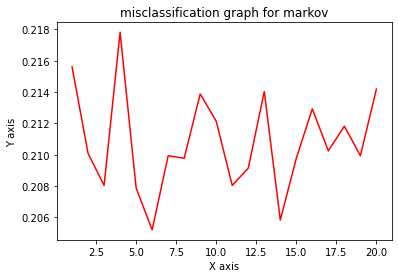

mean misclassification rate for markov sample with std (21.08201892744479, 0.3147626418489949)


In [ ]:
print("mean misclassification rate for markov sample with std",svm_markov(Data_trainm,Data_testm))